In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# X and Y
X_values = np.array([5, 10, 15, 20, 25,30]).reshape(-1, 1)
X_b = np.c_[np.ones((len(X_values), 1)), X_values]
Y_values = 25 * X_values + 10

In [3]:
np.random.seed(42)
noise = np.random.normal(loc=0, scale=50, size=Y_values.shape)
Y_noisy = Y_values + noise

W_noisy = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y_noisy)
print("(W):", W_noisy[1])
print("(b):", W_noisy[0])

(W): [24.12383387]
(b): [42.50688988]


In [4]:
W = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y_values)
print("(W):", W[1])
print("(b):", W[0])
W

(W): [25.]
(b): [10.]


array([[10.],
       [25.]])

In [5]:
print(f"Equation: Y = {round(W[1][0])}*X + {round(W[0][0])}")

Equation: Y = 25*X + 10


In [6]:
X_values

array([[ 5],
       [10],
       [15],
       [20],
       [25],
       [30]])

Enter an additional X value: 25


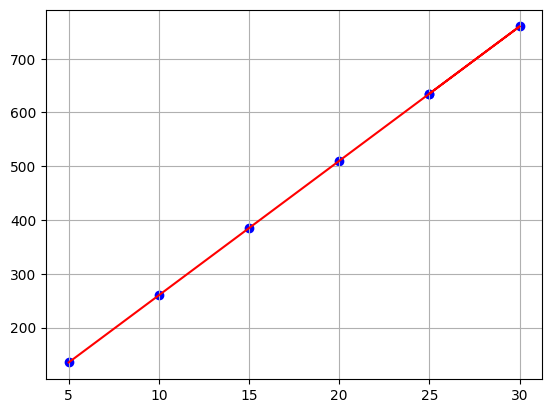

In [7]:
test_X = int(input("Enter an additional X value: "))
test_Y = W[1] * test_X + W[0][0]
X_values = np.append(X_values, [[test_X]], axis=0)
Y_values = np.append(Y_values, [[round(test_Y[0])]], axis=0)

plt.scatter(X_values, Y_values, color='blue', label='Data Points')
plt.plot(X_values, W[1] * X_values + W[0], color='red', label='Regression Line')

plt.grid(True)
plt.show()

In [12]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')
df = df.drop('Id', axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df['Species'] = df['Species'].replace({'Iris-setosa': 'Class I'})
df['Species'] = df['Species'].replace({'Iris-virginica': 'Other classes', 'Iris-versicolor': 'Other classes'})
df['Species']

0            Class I
1            Class I
2            Class I
3            Class I
4            Class I
           ...      
145    Other classes
146    Other classes
147    Other classes
148    Other classes
149    Other classes
Name: Species, Length: 150, dtype: object

In [14]:
class_I_train = df[df['Species'] == 'Class I'].sample(frac=0.8, random_state=45)
class_I_test = df[df['Species'] == 'Class I'].drop(class_I_train.index)

class_II_train = df[df['Species'] == 'Other classes'].sample(frac=0.8, random_state=45)
class_II_test = df[df['Species'] == 'Other classes'].drop(class_II_train.index)

train_df = pd.concat([class_I_train, class_II_train])
y_test= pd.concat([class_I_test, class_II_test])["Species"]
test_df = pd.concat([class_I_test, class_II_test]).drop(columns=["Species"])
y_test

1            Class I
3            Class I
4            Class I
11           Class I
15           Class I
21           Class I
30           Class I
31           Class I
32           Class I
35           Class I
53     Other classes
58     Other classes
62     Other classes
64     Other classes
65     Other classes
80     Other classes
82     Other classes
84     Other classes
85     Other classes
96     Other classes
103    Other classes
107    Other classes
111    Other classes
115    Other classes
118    Other classes
122    Other classes
125    Other classes
135    Other classes
137    Other classes
145    Other classes
Name: Species, dtype: object

In [15]:
X_train = train_df.drop('Species', axis=1).values
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_train = np.where(train_df['Species'] == 'Class I', 1, -1)
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

In [16]:
w

array([-0.51422599,  0.04563509,  0.5458669 , -0.45478986, -0.04018945])

In [17]:
w2=test_df.values[1]
w2

array([4.6, 3.1, 1.5, 0.2])

In [18]:
prediction=w[-1]*w2[-1]+w[-2]*w2[-2]+w[-3]*w2[-3]+w[-4]*w2[-4]+w[0]
if prediction>0:
  print("Class I")
else:
  print("Other Classes")

Class I


In [19]:
predictions = np.dot(X_b, w)
train_predictions=np.where(predictions >= 0, 1, -1)

In [20]:
train_accuracy = np.mean(train_predictions == y_train)
print("Training Accuracy:", train_accuracy*100,"%")

Training Accuracy: 100.0 %
